파일명 : python_ts_241122.ipynb

소스코드 참조 : 시계열강의_입문.ipynb

# 한글 폰트 설치

In [61]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [62]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


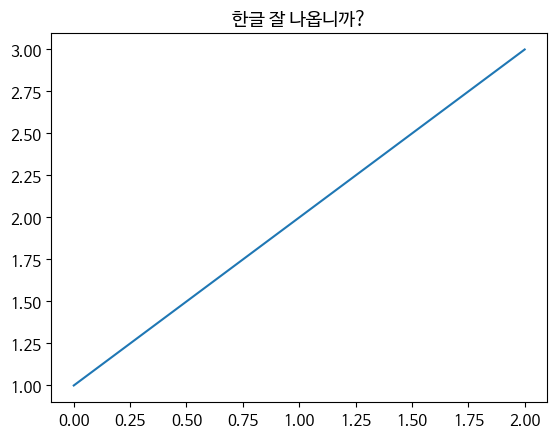

In [63]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# 구글 드라이브 연동

In [64]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 라이브러리

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 파이썬 시계열 기본 라이브러리
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# 데이버 불러오기

In [66]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/시계열/data/'

df = pd.read_csv(DATA_PATH + 'jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    84 non-null     object 
 1   data    84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [68]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


# 데이터 시각화

In [69]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


# 시각화

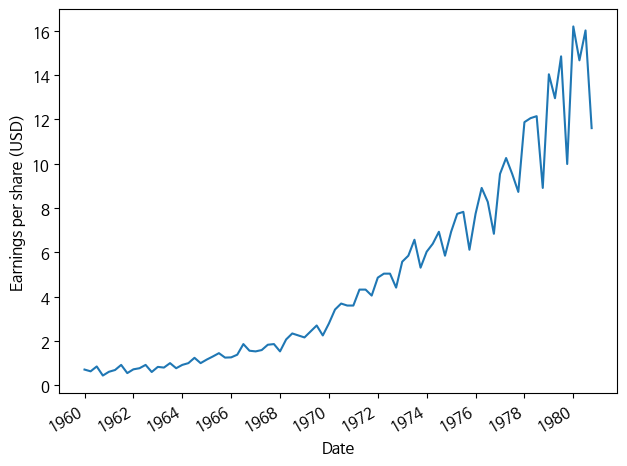

In [70]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

## 시계열 분해 및 시각화
- 메서드 참고 : https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html

<ipython-input-71-5dbbeeea1dbe>:20: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


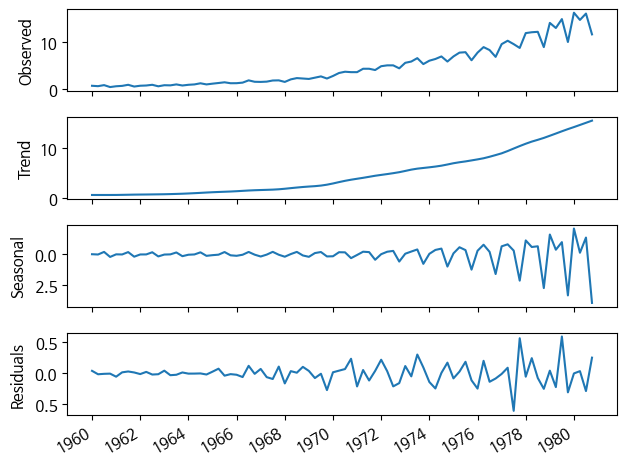

In [71]:
advanced_decomposition = STL(df.data, period=4).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# 데이터 복원

In [72]:
df = df.drop('year', axis=1)
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


# 베이스라인 모델 설계
- 훈련데이터 : 1960년 ~ 1979년
- 예측데이터 : 1980년

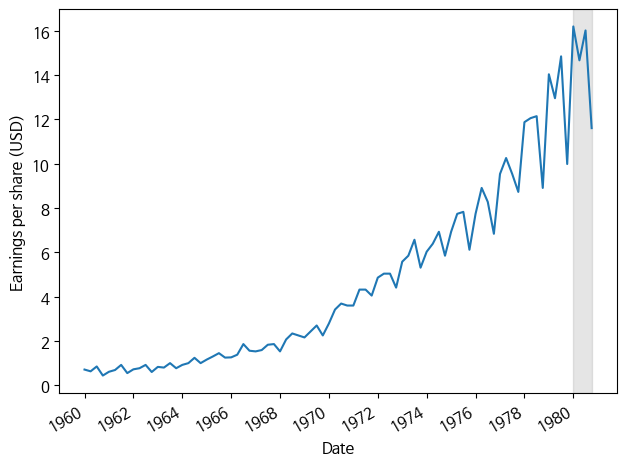

In [73]:
fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

# 평가지표 만들기
- MAPE 함수 만들기

In [74]:
from sklearn.metrics import mean_absolute_percentage_error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 모델 1

## 데이터셋 분리
- 훈련 데이터 : 1960~1979
- 테스트 데이터 : 1980

In [75]:
train = df[:-4]
test = df[-4:]

In [76]:
train.head(1)

,date,data
0,1960-01-01,0.71


In [77]:
test.head(1)

,date,data
80,1980-01-01,16.2


## 모델 학습

In [78]:
historical_mean = np.mean(train['data'])
test.loc[:, 'pred_mean'] = historical_mean
test

<ipython-input-78-c29612a51b2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = historical_mean


,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


## 모델평가

In [79]:
mape_hist_mean = mape(test['data'], test['pred_mean']) # 70% 차이 발생
mape_hist_mean

70.00752579965119

In [80]:
mean_absolute_percentage_error(test['data'], test['pred_mean']) * 100

70.00752579965119

## 모델 시각화

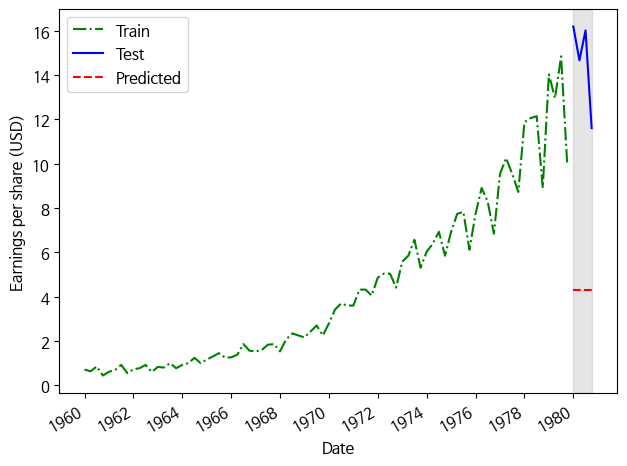

In [81]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

# 모델 2

In [82]:
last_year_mean = np.mean(train['data'][-4:])
test.loc[:, 'pred_last_yr_mean'] = last_year_mean
mean_absolute_percentage_error(test['data'], test['pred_last_yr_mean']) * 100

<ipython-input-82-ae7a9b7f868b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_yr_mean'] = last_year_mean


15.5963680725103

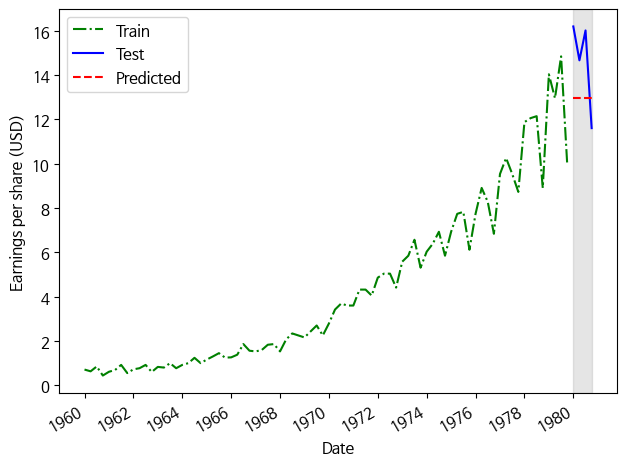

In [83]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

# 모델 1과 모델 2 비교

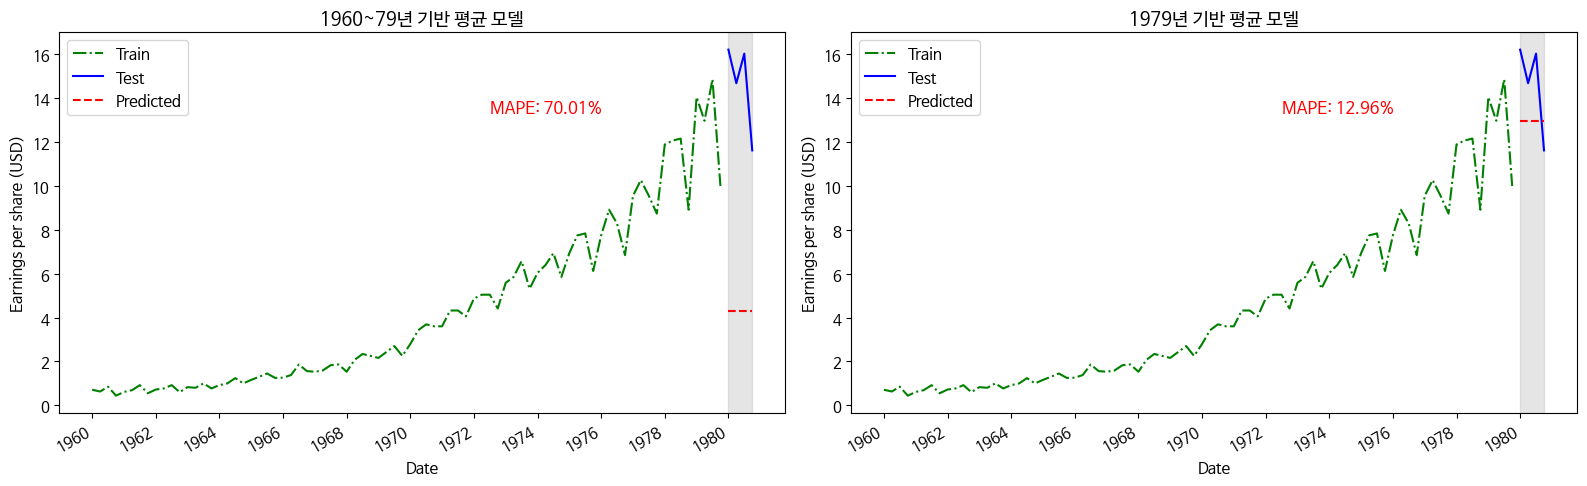

In [84]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))

# Plot for 1960~79 mean model
ax[0].plot(train['date'], train['data'], 'g-.', label='Train')
ax[0].plot(test['date'], test['data'], 'b-', label='Test')
ax[0].plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax[0].set_title('1960~79년 기반 평균 모델')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Earnings per share (USD)')
ax[0].axvspan(80, 83, color='#808080', alpha=0.2)
ax[0].legend(loc=2)
ax[0].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[0].text(50, max(train['data']) * 0.9, f"MAPE: {round(mape_hist_mean, 2)}%", color='red', fontsize=12)

# Plot for 1979 mean model
ax[1].plot(train['date'], train['data'], 'g-.', label='Train')
ax[1].plot(test['date'], test['data'], 'b-', label='Test')
ax[1].plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Predicted')
ax[1].set_title('1979년 기반 평균 모델')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Earnings per share (USD)')
ax[1].axvspan(80, 83, color='#808080', alpha=0.2)
ax[1].legend(loc=2)
ax[1].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[1].text(50, max(train['data']) * 0.9, f"MAPE: {round(last_year_mean, 2)}%", color='red', fontsize=12)

# Format date labels and save the figure
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig('earnings_per_share_forecast.png')  # Save the figure
plt.show()

# 계절적 예측 구현
- 계절성이 있음
- 주기적인 패턴 있음

<ipython-input-85-1836c972f6c8>:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


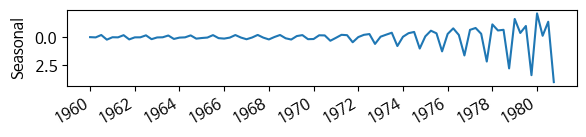

In [85]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

- 마지막으로 측정된 주기가 미래에도 반복되지 않을까?
- 1979년 데이터를 그대로 1980년에 대입

In [86]:
train['data'][-4:].values

array([14.04, 12.96, 14.85,  9.99])

In [87]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

<ipython-input-87-ee263d27c05d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['data'][-4:].values


11.561658552433654

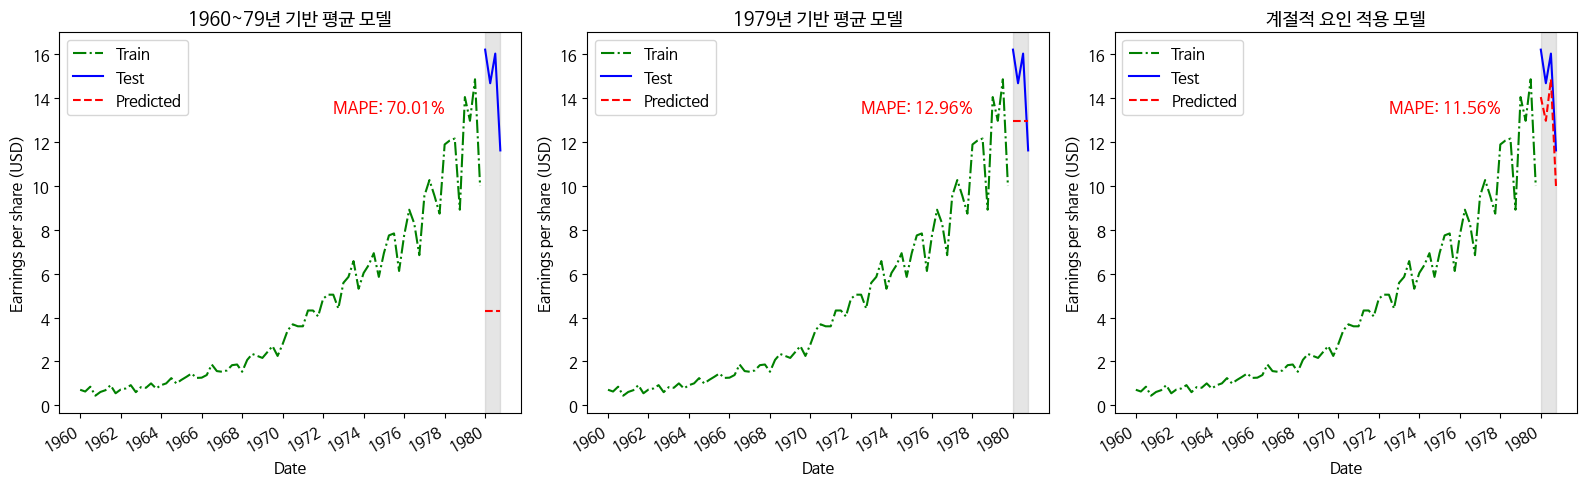

In [88]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 5))

# Plot for 1960~79 mean model
ax[0].plot(train['date'], train['data'], 'g-.', label='Train')
ax[0].plot(test['date'], test['data'], 'b-', label='Test')
ax[0].plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax[0].set_title('1960~79년 기반 평균 모델')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Earnings per share (USD)')
ax[0].axvspan(80, 83, color='#808080', alpha=0.2)
ax[0].legend(loc=2)
ax[0].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[0].text(50, max(train['data']) * 0.9, f"MAPE: {round(mape_hist_mean, 2)}%", color='red', fontsize=12)

# Plot for 1979 mean model
ax[1].plot(train['date'], train['data'], 'g-.', label='Train')
ax[1].plot(test['date'], test['data'], 'b-', label='Test')
ax[1].plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Predicted')
ax[1].set_title('1979년 기반 평균 모델')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Earnings per share (USD)')
ax[1].axvspan(80, 83, color='#808080', alpha=0.2)
ax[1].legend(loc=2)
ax[1].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[1].text(50, max(train['data']) * 0.9, f"MAPE: {round(last_year_mean, 2)}%", color='red', fontsize=12)

# Plot for 1979 mean model
ax[2].plot(train['date'], train['data'], 'g-.', label='Train')
ax[2].plot(test['date'], test['data'], 'b-', label='Test')
ax[2].plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax[2].set_title('계절적 요인 적용 모델')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Earnings per share (USD)')
ax[2].axvspan(80, 83, color='#808080', alpha=0.2)
ax[2].legend(loc=2)
ax[2].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[2].text(50, max(train['data']) * 0.9, f"MAPE: {round(mape_naive_seasonal, 2)}%", color='red', fontsize=12)

# Format date labels and save the figure
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig('earnings_per_share_forecast.png')  # Save the figure
plt.show()

# 각 모델 성능 비교

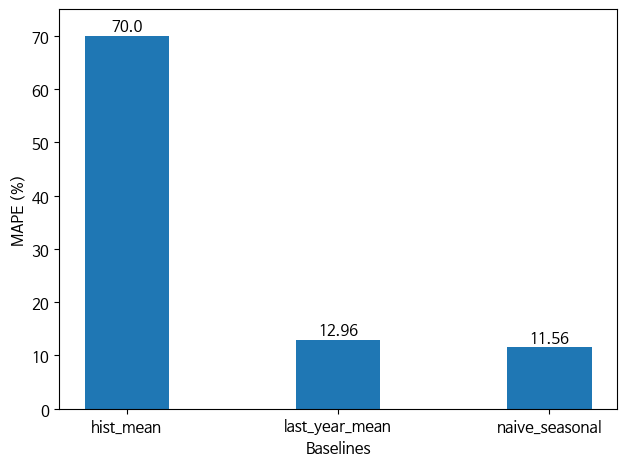

In [89]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'naive_seasonal']
y = [70.00, 12.96, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

# 확률보행 확인
- 참조 : 시계열강의_입문

In [90]:
df = pd.read_csv(DATA_PATH + 'GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


## 데이터 시각화

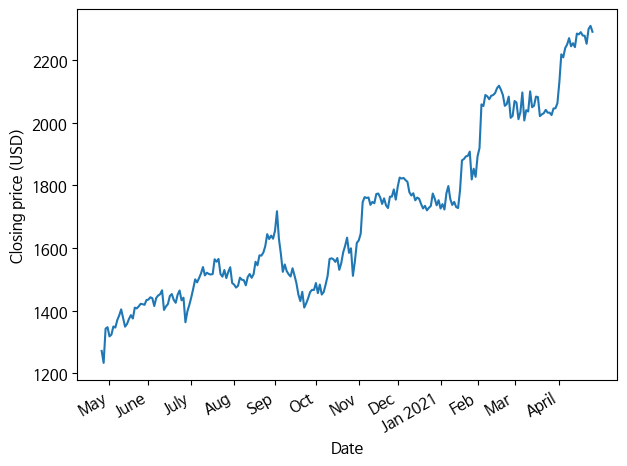

In [91]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

## 확률보행 시각화

<ipython-input-92-d3221f1cacc4>:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


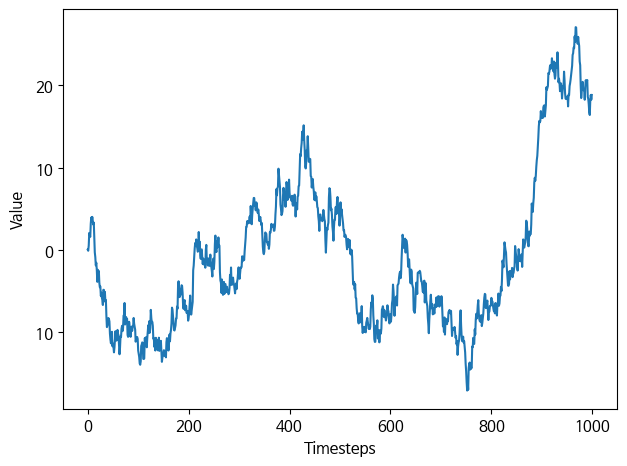

In [92]:
np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

## 정상성 테스트 시각화

In [93]:
import numpy as np
def simulate_process(is_stationary: bool) -> np.array:
    np.random.seed(42)
    process = np.empty(400)

    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10

    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break

    return process

In [94]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)

In [95]:
stationary[1], non_stationary[1]

(0.4967141530112327, 10.496714153011233)

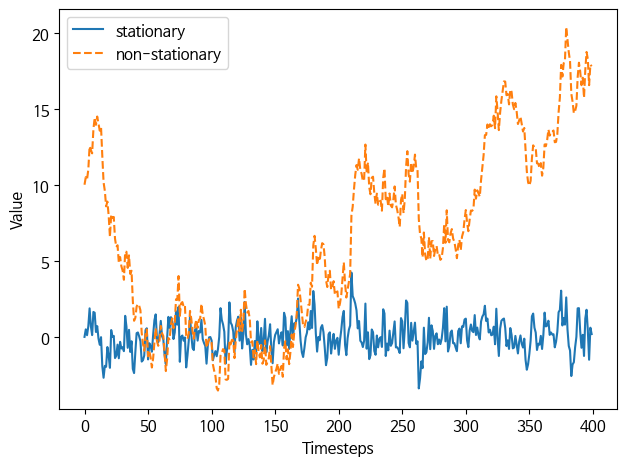

In [96]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle='-', label='stationary')
ax.plot(non_stationary, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()
plt.show()

## 정상성의 조건
- 시점에 상관없이 평균이 일정한가?
- 시점에 상관없이 분산이 일정한가?

In [97]:
mean_func = []
mean_func.append(np.mean(stationary[:3]))
mean_func

[0.20226897611522143]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


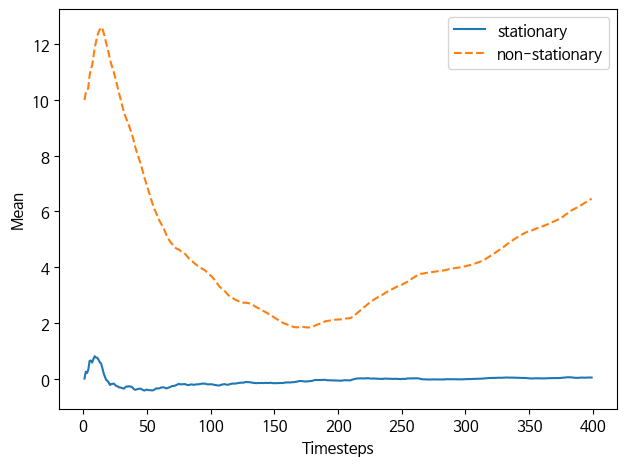

In [98]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []

    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))

    return mean_func

stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


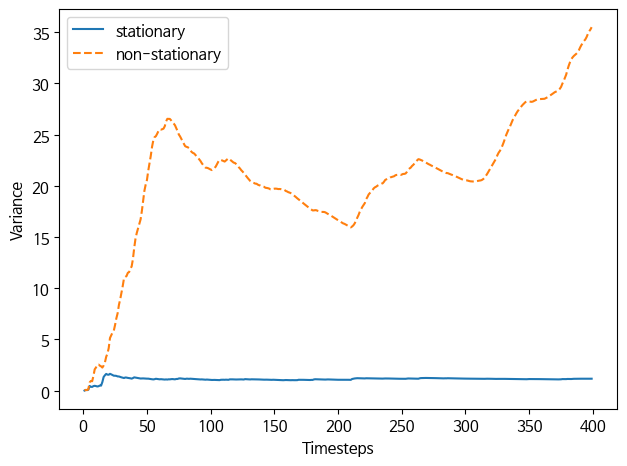

In [99]:
def var_over_time(process: np.array) -> np.array:
    var_func = []

    for i in range(len(process)):
        var_func.append(np.var(process[:i]))

    return var_func

stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()
plt.show()

# 정상성 ADF 테스트
- 귀무가설 : 시계열은 정상성이 아니다. (비정상성)
- 대립가설 : 시계열은 정상성이다.

<ipython-input-100-4fe49fe91c62>:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


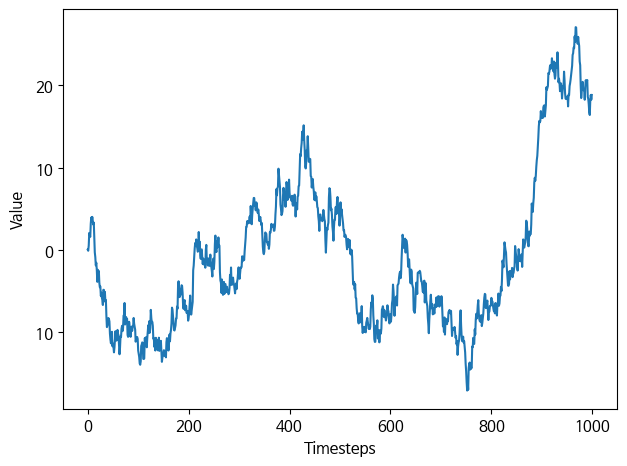

In [100]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

In [101]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk)
print(f'통계량: {ADF_result[0]}, p-value: {ADF_result[1]}')

통계량: -0.965952487691875, p-value: 0.7654789696692581


## ACF 시각화


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


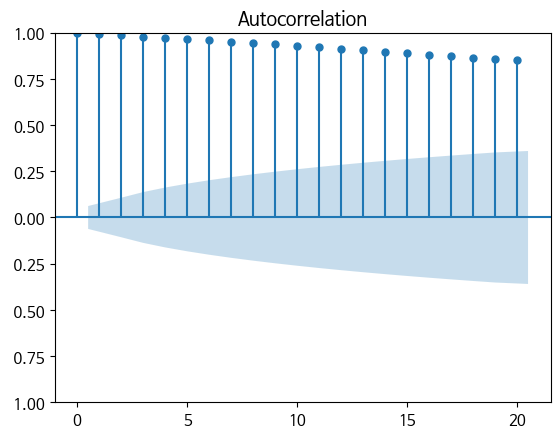

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


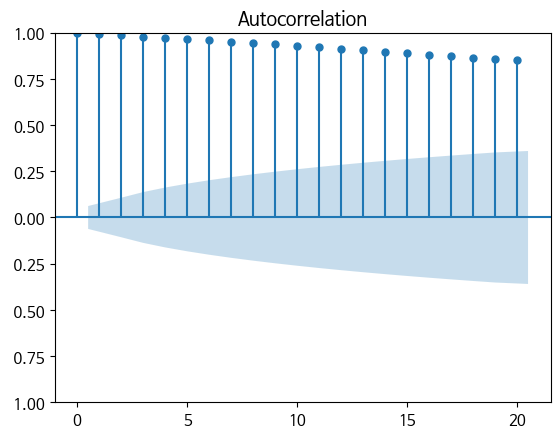

In [103]:
from statsmodels.graphics.tsaplots import plot_acf

# AutoCorrelation Function
# 자기상관 : 특정 시점의 값이 이전 시점(이후 시점)의 값과 상관관계를 가지는 현상
plot_acf(random_walk, lags = 20)

## 차분 적용

통계량: -31.789310857560594, p-value: 0.0


<ipython-input-102-3e50a5fef09b>:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


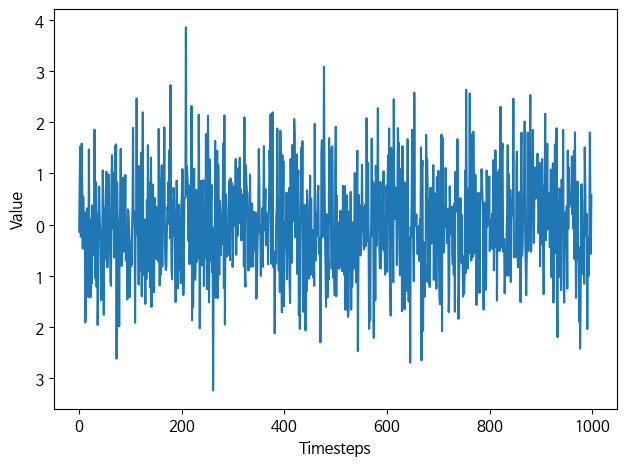

In [102]:
diff_random_walk = np.diff(random_walk, n = 1)

ADF_result = adfuller(diff_random_walk)
print(f'통계량: {ADF_result[0]}, p-value: {ADF_result[1]}')

fig, ax = plt.subplots()

ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

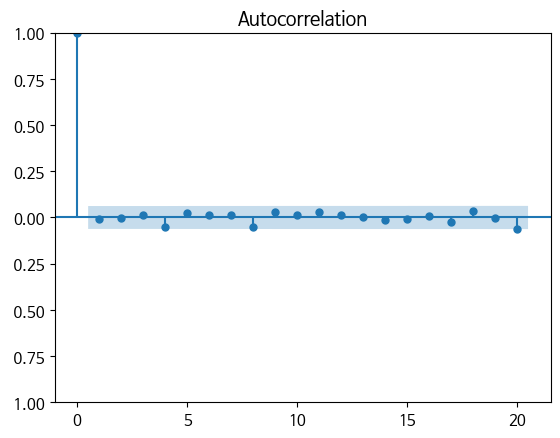

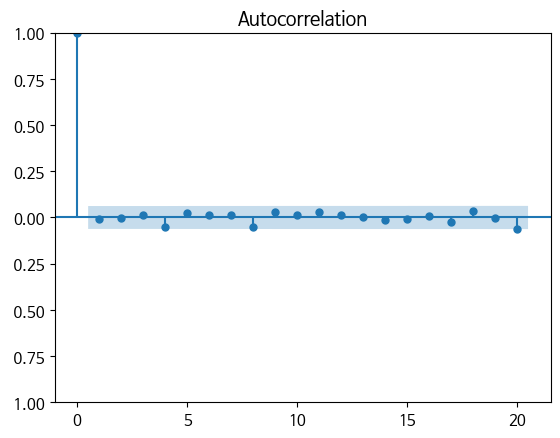

In [104]:
# diff_random_walk는 정상성이 있는 데이터
plot_acf(diff_random_walk, lags = 20)

# Google 주식 데이터에 적용

통계량: 0.16025048664771302, p-value: 0.9699419435913057


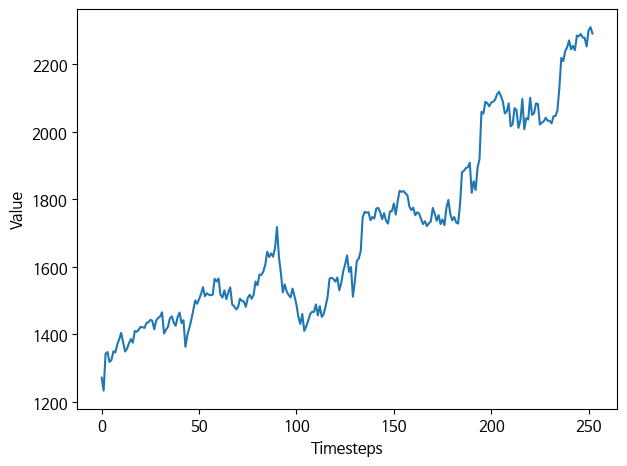

In [106]:
GOOGL_ADF_result = adfuller(df['Close'])

# 귀무가설 : 데이터는 정상성이 아니다.
# 대립가설 : 데이터는 정상성이다.
print(f'통계량: {GOOGL_ADF_result[0]}, p-value: {GOOGL_ADF_result[1]}')

fig, ax = plt.subplots()

ax.plot(df['Close'])
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

## 차분
- np.diff() 활용

통계량: -5.303439704295234, p-value: 5.3865309614545585e-06


<ipython-input-108-d5d94e547be2>:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


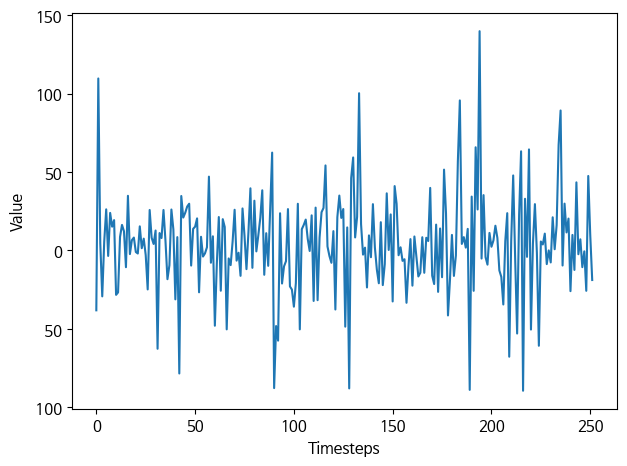

In [108]:
diff_close = np.diff(df['Close'], n = 1)

GOOGL_ADF_result = adfuller(diff_close)

# 귀무가설 : 데이터는 정상성이 아니다.
# 대립가설 : 데이터는 정상성이다.
print(f'통계량: {GOOGL_ADF_result[0]}, p-value: {GOOGL_ADF_result[1]}')

fig, ax = plt.subplots()

ax.plot(diff_close)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

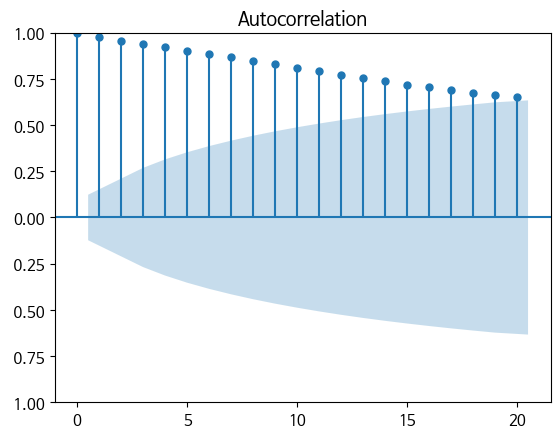

In [112]:
plot_acf(df['Close'], lags=20);

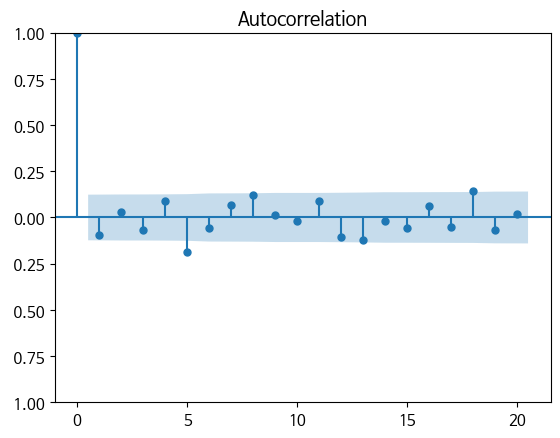

In [113]:
plot_acf(diff_close, lags=20); # 정상시계열, 확률보행,

# 통계적 모형
- 시계열강의_기초.ipynb

## MA 모형

In [115]:
df = pd.read_csv(DATA_PATH + 'widget_sales.csv')
df

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108
...,...
495,64.087371
496,63.992081
497,63.029894
498,61.671797


### 시계열 데이터 시각화

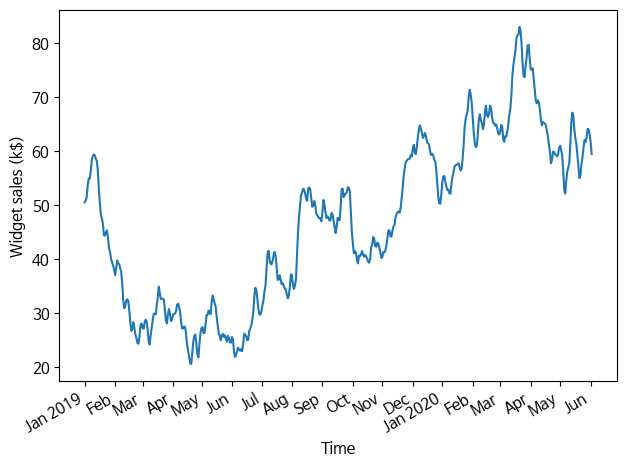

In [116]:
fig, ax = plt.subplots()

ax.plot(df['widget_sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

### 정상성 확인
- 귀무가설 : 주어진 시계열 데이터는 정상성이 아니다
- 대립가설 : 주어진 시계열 데이터는 정상성이다.

In [118]:
from statsmodels.tsa.stattools import adfuller

def checkADF(data):
  ADF_result = adfuller(data)
  print(f'통계량: {ADF_result[0]}, p-value: {ADF_result[1]}')

checkADF(df['widget_sales'])

통계량: -1.5121662069359048, p-value: 0.5274845352272605


- 정상성이 아니어서 차분을 하겠습니다.

통계량: -10.576657780341959, p-value: 7.076922818587193e-19


<ipython-input-120-520860a2befa>:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


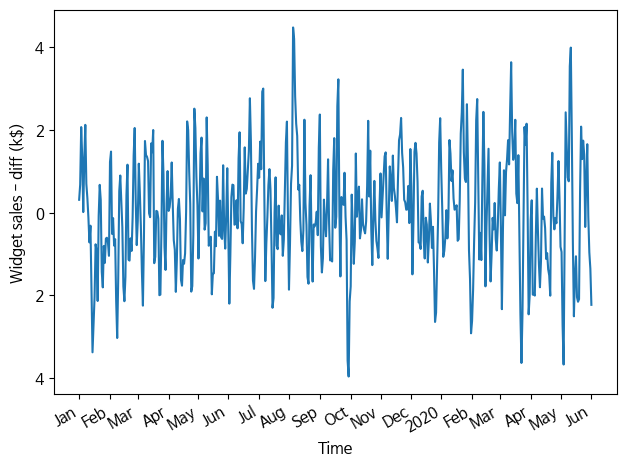

In [120]:
widget_sales_diff = np.diff(df['widget_sales'], n=1)
checkADF(widget_sales_diff)

fig, ax = plt.subplots()

ax.plot(widget_sales_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

### 자기상관관계 그래프

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


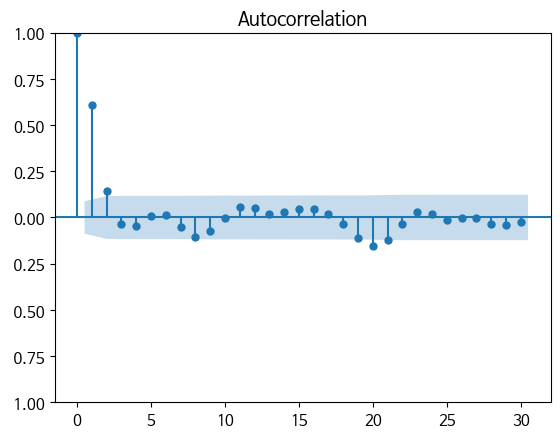

In [121]:
plot_acf(widget_sales_diff, lags = 30)

plt.show()

### 채린님 함수

통계량: -1.5121662069359048, p-value: 0.5274845352272605
p-value가 0.05보다 크므로, 정상성을 만족하지 않습니다. 차분을 하겠습니다.


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


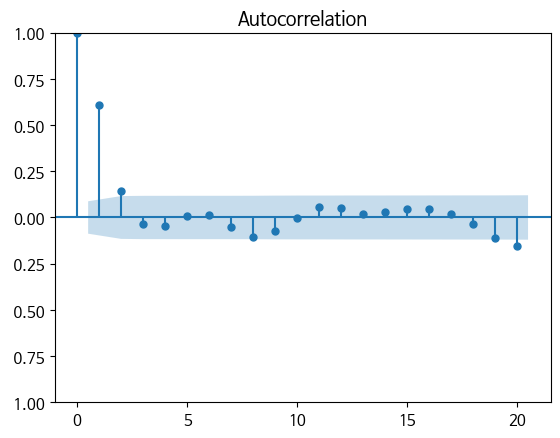

In [127]:
def check_ADF_draw_ACF_ver2(data):
    from statsmodels.tsa.stattools import adfuller

    ADF_result = adfuller(data)
    print(f'통계량: {ADF_result[0]}, p-value: {ADF_result[1]}')
    # p-value 확인 및 메시지 출력
    if ADF_result[1] < 0.05:
        print("p-value가 0.05보다 작으므로, 정상성을 만족합니다. 차분이 필요하지 않습니다.")
        plot_acf(data, lags=20)
    else:
        print("p-value가 0.05보다 크므로, 정상성을 만족하지 않습니다. 차분을 하겠습니다.")
        diff=np.diff(data, n=1)
        plot_acf(diff, lags=20)

    return None

check_ADF_draw_ACF_ver2(df['widget_sales'])

### 1차 결론
- MA(2) 모형을 만들어서 이동평균 예측

### 데이터 분리

In [129]:
df_diff = pd.DataFrame({'widget_sales_diff' : widget_sales_diff})
df_diff.head(1)

,widget_sales_diff
0,0.308778


In [130]:
# 훈련 데이터 및 테스트 데이터 분리
train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]

print(len(train))
print(len(test))

449
50


### 데이터 시각화

<ipython-input-131-f9db7c9e811c>:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


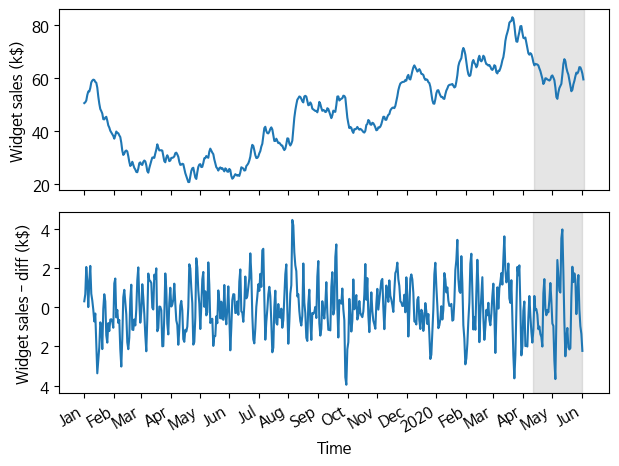

In [131]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(df['widget_sales'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales (k$)')
ax1.axvspan(450, 500, color='#808080', alpha=0.2)

ax2.plot(df_diff['widget_sales_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff (k$)')
ax2.axvspan(449, 498, color='#808080', alpha=0.2)

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

### 롤링 예측 함수 구현
- 모든 시계열 예측 문제를 풀 때의 핵심 키워드 : 롤링 예측 함수 구현

In [133]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    """
    롤링 윈도우 방법으로 시계열 데이터를 예측하는 함수.

    매개변수:
    - df (pd.DataFrame): 입력 시계열 데이터.
    - train_len (int): 학습 데이터의 길이 (초기 학습 구간 크기).
    - horizon (int): 예측할 데이터의 기간 (총 예측 기간).
    - window (int): 롤링 윈도우 크기, 한 번에 예측할 시간 단계 횟수 지정 (1일, 2일, 3일)
    - method (str): 예측 방법 ('mean', 'last', 'MA' 중 하나 선택).

    반환값:
    - list: 예측된 값의 리스트.
    """

    # 학습 기간과 예측 기간을 합친 전체 길이
    total_len = train_len + horizon

    # 'mean' 방법: 이전 데이터의 평균값을 예측 값으로 사용
    if method == 'mean':
        pred_mean = []

        for i in range(train_len, total_len, window):  # 윈도우 단위로 반복
            # 현재 윈도우 이전까지의 평균 계산
            mean = np.mean(df[:i].values)
            # 계산된 평균값을 현재 윈도우 크기만큼 예측값 리스트에 추가
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    # 'last' 방법: 이전 데이터의 마지막 값을 예측 값으로 사용
    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):  # 윈도우 단위로 반복
            # 현재 윈도우 이전까지의 마지막 값 가져오기
            last_value = df[:i].iloc[-1].values[0]
            # 가져온 마지막 값을 현재 윈도우 크기만큼 예측값 리스트에 추가
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    # 'MA' 방법: 이동평균(MA) 모델을 사용해 예측
    elif method == 'MA':
        pred_MA = []

        for i in range(train_len, total_len, window):  # 윈도우 단위로 반복
            # SARIMAX 모델 설정: (0,0,2)은 MA(2) 모델을 의미
            #                              p, d, q
            model = SARIMAX(df[:i], order=(0, 0, 2))
            # SARIMAX 모델 학습
            res = model.fit(disp=False)
            # 학습된 모델로 예측 수행
            predictions = res.get_prediction(0, i + window - 1)
            # 예측값 중 마지막 윈도우에 해당하는 값들 가져오기
            oos_pred = predictions.predicted_mean.iloc[-window:]
            # 예측값을 결과 리스트에 추가
            pred_MA.extend(oos_pred)

        return pred_MA


In [134]:
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')

pred_df['pred_mean'] = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_MA'] = pred_MA

pred_df.head()

,widget_sales_diff,pred_mean,pred_last_value,pred_MA
449,-1.170131,0.034319,-1.803658,-1.078833
450,0.580967,0.034319,-1.803658,-0.273309
451,-0.144902,0.032861,0.580967,0.781223
452,-0.096564,0.032861,0.580967,0.234969
453,-0.372334,0.032183,-0.096564,0.168994


### 데이터 시각화 (비교)
- 모델 1 : 평균
- 모델 2 : 마지막으로 측정된 값을 그대로 활용
- 모델 3 : 통계모형, MA(2)

<ipython-input-135-cd8101597328>:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


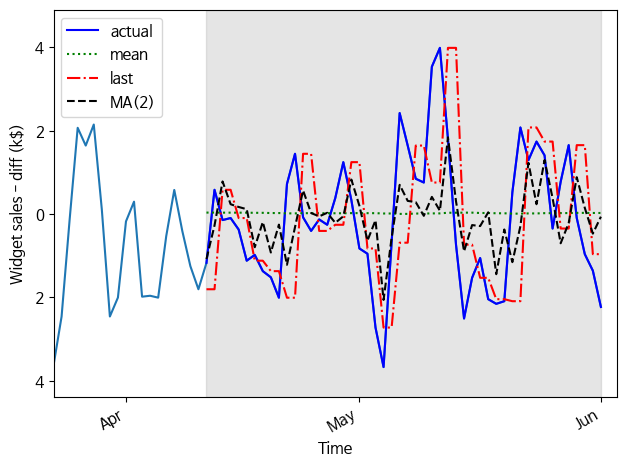

In [135]:
fig, ax = plt.subplots()

ax.plot(df_diff['widget_sales_diff'])
ax.plot(pred_df['widget_sales_diff'], 'b-', label='actual')
ax.plot(pred_df['pred_mean'], 'g:', label='mean')
ax.plot(pred_df['pred_last_value'], 'r-.', label='last')
ax.plot(pred_df['pred_MA'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

ax.axvspan(449, 498, color='#808080', alpha=0.2)

ax.set_xlim(430, 500)

plt.xticks(
    [439, 468, 498],
    ['Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

### 모형 평가
- MA(2) 모형이 가장 좋았음 (다행이군)

In [136]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_mean'])
mse_last = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_last_value'])
mse_MA = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_MA'])

print(mse_mean, mse_last, mse_MA)

2.5606299456880537 3.2494260812249225 1.948171449776926


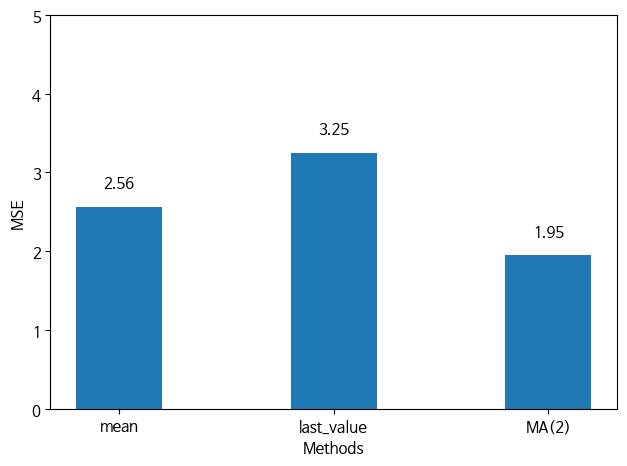

In [137]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'MA(2)']
y = [mse_mean, mse_last, mse_MA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')

plt.tight_layout()
plt.show()

### 예측결과 역변환
-

In [138]:
df['pred_widget_sales'] = pd.Series()
df['pred_widget_sales'][450:] = df['widget_sales'].iloc[450] + pred_df['pred_MA'].cumsum()
df

<ipython-input-138-54b82a257bda>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['pred_widget_sales'][450:] = df['widget_sales'].iloc[450] + pred_df['pred_MA'].cumsum()
<ipython-input-138-54b82a257bda>:2: SettingWithCopyWarning: 
A value

,widget_sales,pred_widget_sales
0,50.496714,NaN
1,50.805493,NaN
2,51.477758,NaN
3,53.542228,NaN
4,54.873108,NaN
...,...,...
495,64.087371,60.335201
496,63.992081,61.218392
497,63.029894,61.365771
498,61.671797,60.895973


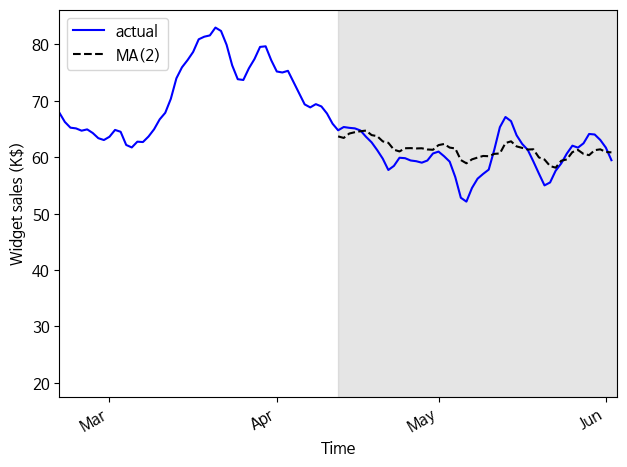

In [139]:
fig, ax = plt.subplots()

ax.plot(df['widget_sales'], 'b-', label='actual')
ax.plot(df['pred_widget_sales'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (K$)')

ax.axvspan(450, 500, color='#808080', alpha=0.2)

ax.set_xlim(400, 500)

plt.xticks(
    [409, 439, 468, 498],
    ['Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()